In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [244]:
stock_data = pd.read_csv('./MSFT3.csv')
stock_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,06-11-2015,54.090000,54.980000,53.959999,54.919998,49.046444,32851200
1,09-11-2015,54.549999,54.869999,53.560001,54.160000,48.367729,32513100
2,10-11-2015,54.070000,54.130001,53.270000,53.509998,47.787235,55283700
3,11-11-2015,53.700001,54.200001,53.459999,53.650002,47.912277,36516300
4,12-11-2015,53.480000,53.980000,53.189999,53.320000,47.617561,35361100


In [245]:
stock_data.shape


(1762, 7)

In [246]:
stock_data.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [247]:
stock_data.isna().any()


Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [248]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1762 non-null   object 
 1   Open       1762 non-null   float64
 2   High       1762 non-null   float64
 3   Low        1762 non-null   float64
 4   Close      1762 non-null   float64
 5   Adj Close  1762 non-null   float64
 6   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB


In [249]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,152.593734,154.116600,150.967860,152.612310,148.830922,2.936978e+07
std,86.683666,87.641150,85.640722,86.676298,87.805875,1.311647e+07
min,48.680000,49.150002,48.040001,48.430000,44.161423,7.425600e+06
25%,72.972500,73.359998,72.482502,72.882502,68.391661,2.106820e+07
50%,125.615002,126.540001,124.629998,125.924999,121.811302,2.610305e+07
75%,229.887497,233.527500,226.692498,228.970005,227.293824,3.361610e+07
max,344.619995,349.670013,342.200012,343.109985,340.882813,1.335030e+08


In [250]:
print(len(stock_data))

1762


<AxesSubplot:>

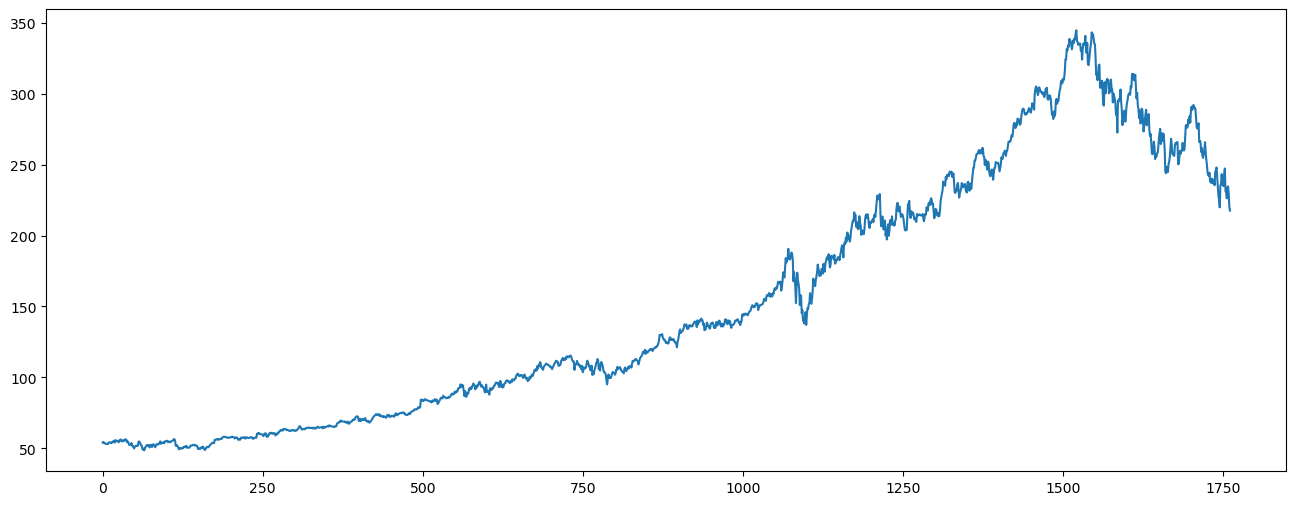

In [251]:
stock_data['Open'].plot(figsize=(16,6))

In [252]:
X = stock_data[['Open', 'High','Low','Volume']]
Y= stock_data['Close']

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [254]:
X_train.shape

(1321, 4)

In [255]:
X_test.shape

(441, 4)

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [257]:
regressor.fit(X_train,Y_train)


LinearRegression()

In [258]:
print(regressor.coef_)

[-6.65881521e-01  7.98146096e-01  8.68951386e-01 -3.09239583e-09]


In [259]:
print(regressor.intercept_)

0.10699843665636877


In [260]:
predicted=regressor.predict(X_test)

In [261]:
print(X_test)

            Open        High         Low    Volume
1165  197.800003  200.610001  195.470001  27803900
668    99.500000   99.919998   99.029999  18977400
412    69.209999   69.839996   68.790001  25806200
558    93.120003   94.059998   92.580002  29172200
1344  234.009995  235.820007  233.229996  22653700
...          ...         ...         ...       ...
921   136.000000  136.970001  135.800003  19953100
96     53.660000   54.860001   53.450001  23924300
769   106.269997  107.330002  105.360001  29124500
178    56.470001   56.740002   56.259998  25610600
108    55.220001   55.580002   55.070000  20877100

[441 rows x 4 columns]


In [262]:
predicted.shape

(441,)

In [263]:
dframe=pd.DataFrame(Y_test,predicted)

In [264]:
dfr=pd.DataFrame({'Actual Price': Y_test,'Predicted Price':predicted})

In [265]:
print(dfr)

      Actual Price  Predicted Price
1165    200.339996       198.279668
668      99.760002        99.596113
412      69.800003        69.459223
558      94.059998        93.531038
1344    235.750000       235.098359
...            ...              ...
921     136.460007       136.811081
96       54.709999        54.533561
769     107.139999       106.471448
178      56.730000        56.599485
108      55.360001        55.486574

[441 rows x 2 columns]


In [266]:
dfr.head(25)

,Actual Price,Predicted Price
1165,200.339996,198.279668
668,99.760002,99.596113
412,69.800003,69.459223
558,94.059998,93.531038
1344,235.750000,235.098359
1323,242.820007,242.499201
1081,170.169998,171.379537
999,144.190002,144.813760
1686,264.839996,261.815853
1761,221.389999,217.452249


In [267]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [268]:
regressor.score(X_test, Y_test)

0.9997689215353729

In [269]:
import math

In [270]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,predicted))

Mean Absolute Error: 0.728196891969281


In [271]:
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,predicted))

Mean Squared Error: 1.6781503244853246


In [272]:
print('Root Mean squared Error:',math.sqrt(metrics.mean_absolute_error(Y_test,predicted)))

Root Mean squared Error: 0.8533445329814219


In [273]:
graph=dfr.head(20)

<AxesSubplot:>

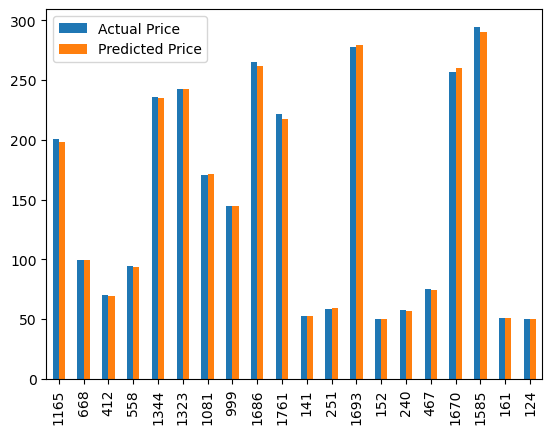

In [274]:
graph.plot(kind='bar')

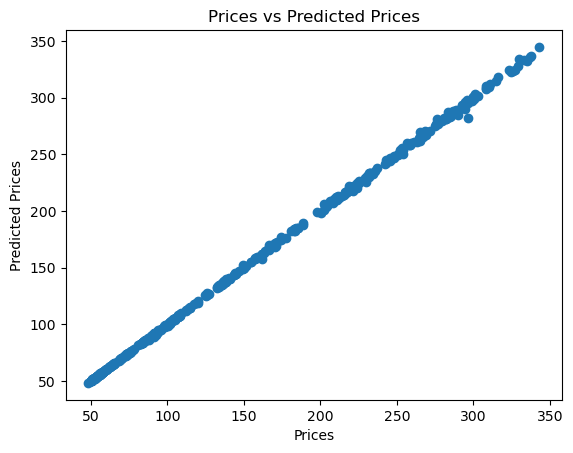

In [275]:
plt.scatter(Y_test, predicted)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()


In [276]:
#DecisionTreeRegressor

In [277]:
X = stock_data[['Open', 'High','Low','Volume']]
Y= stock_data['Close']

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [279]:
X_train.shape

(1321, 4)

In [280]:
X_test.shape

(441, 4)

In [281]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
tree =DecisionTreeRegressor().fit(X_train,Y_train)

In [282]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [283]:
predicted=tree.predict(X_test)

In [284]:
print(X_test)

            Open        High         Low    Volume
1165  197.800003  200.610001  195.470001  27803900
668    99.500000   99.919998   99.029999  18977400
412    69.209999   69.839996   68.790001  25806200
558    93.120003   94.059998   92.580002  29172200
1344  234.009995  235.820007  233.229996  22653700
...          ...         ...         ...       ...
921   136.000000  136.970001  135.800003  19953100
96     53.660000   54.860001   53.450001  23924300
769   106.269997  107.330002  105.360001  29124500
178    56.470001   56.740002   56.259998  25610600
108    55.220001   55.580002   55.070000  20877100

[441 rows x 4 columns]


In [285]:
predicted.shape

(441,)

In [286]:
dframe=pd.DataFrame(Y_test,predicted)

In [287]:
dfr=pd.DataFrame({'Actual Price': Y_test,'Predicted Price':predicted})

In [288]:
print(dfr)

      Actual Price  Predicted Price
1165    200.339996       200.570007
668      99.760002        98.839996
412      69.800003        69.459999
558      94.059998        93.860001
1344    235.750000       234.809998
...            ...              ...
921     136.460007       137.059998
96       54.709999        54.459999
769     107.139999       106.709999
178      56.730000        56.580002
108      55.360001        55.430000

[441 rows x 2 columns]


In [289]:
dfr.head(25)

,Actual Price,Predicted Price
1165,200.339996,200.570007
668,99.760002,98.839996
412,69.800003,69.459999
558,94.059998,93.860001
1344,235.750000,234.809998
1323,242.820007,244.490005
1081,170.169998,171.880005
999,144.190002,148.339996
1686,264.839996,262.519989
1761,221.389999,214.250000


In [290]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [291]:
tree.score(X_test, Y_test)

0.9991798153337366

In [292]:
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,predicted))
print('Root Mean squared Error:',math.sqrt(metrics.mean_absolute_error(Y_test,predicted)))

Mean Absolute Error: 1.3252381179138317
Mean Squared Error: 5.95638873596018
Root Mean squared Error: 1.1511898704878496


In [293]:
graph=dfr.head(20)

<AxesSubplot:>

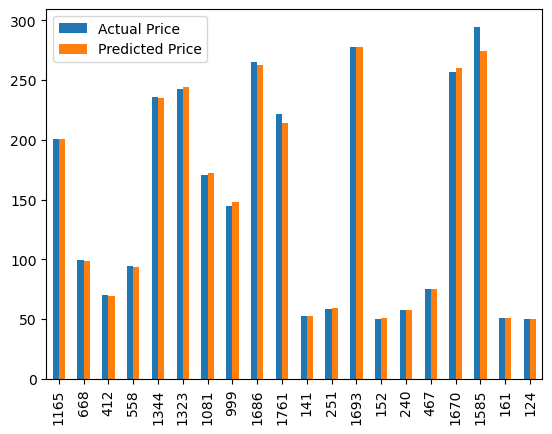

In [294]:
graph.plot(kind='bar')

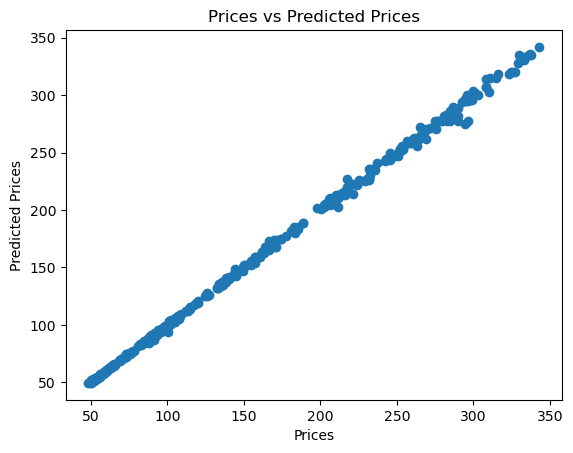

In [295]:
plt.scatter(Y_test, predicted)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [296]:
#randomforestregressor

In [311]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,06112015,54.090000,54.980000,53.959999,54.919998,49.046444,32851200
1,09112015,54.549999,54.869999,53.560001,54.160000,48.367729,32513100
2,10112015,54.070000,54.130001,53.270000,53.509998,47.787235,55283700
3,11112015,53.700001,54.200001,53.459999,53.650002,47.912277,36516300
4,12112015,53.480000,53.980000,53.189999,53.320000,47.617561,35361100


In [312]:
data1= stock_data

In [313]:
type(data1)

pandas.core.frame.DataFrame

In [314]:
stock_data.index

RangeIndex(start=0, stop=1762, step=1)

In [315]:
X = stock_data.drop('Close', axis=1)

In [316]:
y= stock_data['Close']

In [317]:
X = stock_data.iloc[:, 0:5].values
y = stock_data.iloc[:, 5].values


In [318]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [319]:
abc=[]
for i in range(len(stock_data)):
    abc.append(stock_data['Date'][i].split('-'))
    stock_data['Date'][i] = ''.join(abc[i])

C:\Users\MOHIT JAIN\AppData\Local\Temp\ipykernel_13484\4240881069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'][i] = ''.join(abc[i])


In [320]:
stock_data['Date'].tail()

1757    31102022
1758    01112022
1759    02112022
1760    03112022
1761    04112022
Name: Date, dtype: object

In [321]:
X = stock_data.drop('Close', axis=1)


In [322]:
X.head()

,Date,Open,High,Low,Adj Close,Volume
0,06112015,54.090000,54.980000,53.959999,49.046444,32851200
1,09112015,54.549999,54.869999,53.560001,48.367729,32513100
2,10112015,54.070000,54.130001,53.270000,47.787235,55283700
3,11112015,53.700001,54.200001,53.459999,47.912277,36516300
4,12112015,53.480000,53.980000,53.189999,47.617561,35361100


In [323]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [324]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [325]:
from sklearn import metrics
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9999102964398385
Mean Absolute Error: 0.5029860427762041
Mean Squared Error: 0.6748574913414016
Root Mean Squared Error: 0.8214971036719494


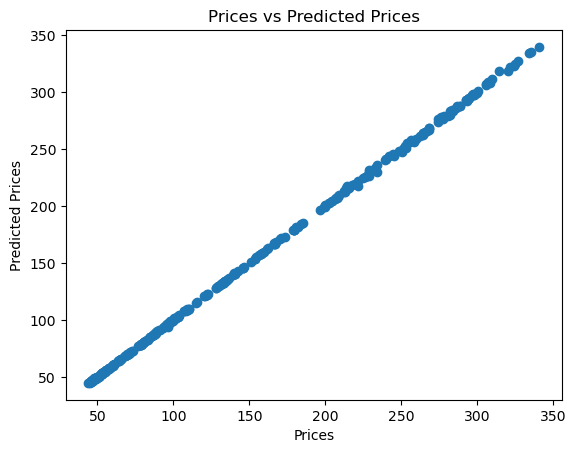

In [326]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()
